# Classification

In [56]:
import pandas as pd
from sklearn.metrics import accuracy_score

import evaluation as eval
import classification_utils as class_utils

df = pd.read_csv('../data/transformed.csv')
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,coachID_2,coachID_3,coachID_4,coachID_5,confID,year,firstRound,semis,finals,playoff
0,-3.613542,4.417037,-0.812555,1.146066,0.188419,0.443958,-2.600312,0.904612,0.427530,0.682001,...,0,0,0,1,0,2,0,0,0,1
1,-3.329215,-2.587446,1.600648,-1.820403,-2.323184,-1.785964,-0.105385,1.265699,1.409357,1.435763,...,0,0,1,0,0,2,1,1,0,1
2,-2.108120,1.866611,2.282237,1.407701,1.069747,-0.514601,0.880634,0.453529,2.691131,0.635747,...,0,0,1,1,0,2,0,0,0,0
3,-1.647919,-7.518575,-0.834120,0.207635,2.045530,-0.259270,-0.552444,1.864061,1.151827,-0.758566,...,0,1,0,0,1,2,1,1,1,1
4,-4.381025,2.839025,-1.206811,-0.432518,1.757755,-1.578933,-0.107046,0.957103,0.537023,1.224226,...,0,1,0,1,0,2,0,0,0,0


## Algorithms and Param Grids

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [58]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(batch_size=8, max_iter=10000, random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1, 0.5],
    'learning_rate': ['constant', 'adaptive'],
}

In [59]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm_param_grid = {
    'kernel': ['linear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

### Ensembles

In [61]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()
bagging_param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
ada_boost_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['deviance', 'exponential'],
}

In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

## Classification

In [65]:
classifier = mlp
param_grid = mlp_param_grid
target = 'playoff'

---------------------- YEAR 3 ----------------------
Prob:  [0.99988053 0.93931049 0.00197361 0.99727065 0.95246069 0.99995984
 0.99787574 0.07989313 0.98863747 0.00104675 0.06392149 0.0412267
 0.99966633 0.01340035 0.99746591 0.00986416]
Pred:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
AUC: 68.75%
Accuracy: 75.0%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 4 ----------------------
Prob:  [1.16416888e-01 9.88254746e-01 8.85192888e-01 9.29745640e-01
 9.67006009e-01 9.98514737e-01 2.72411921e-04 9.99438087e-01
 7.97496967e-03 3.12525118e-01 3.23646849e-01 9.82268039e-01]
Pred:  [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
AUC: 40.0%
Accuracy: 41.67%
Precision: 50.0%
Recall: 57.14%
F1: 53.33%
---------------------- YEAR 5 ----------------------
Prob:  [1.09998086e-02 5.11695826e-04 8.75048114e-01 9.65981996e-01
 1.74274744e-03 8.23195847e-01 4.01154041e-03 5.06334519e-03
 1.44038193e-07 7.47340070e-04 8.00893785e-01 4.49728319e-02
 8.98844690e-02]
Pred:  [1, 0, 1, 

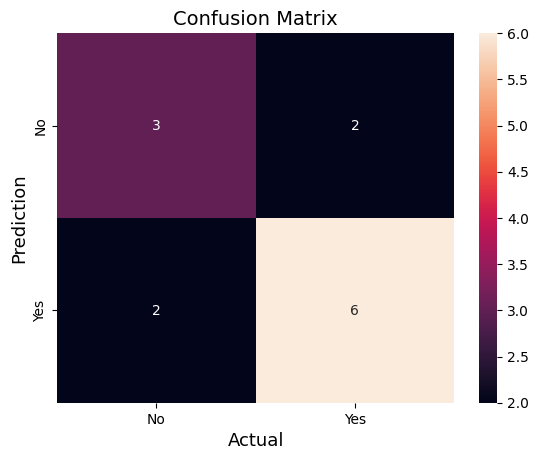

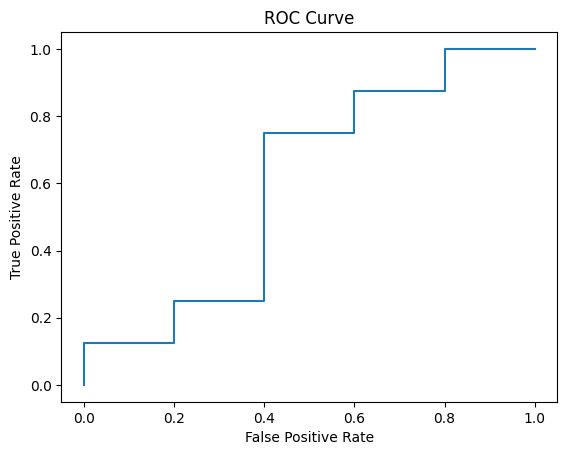

AUC: 60.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%


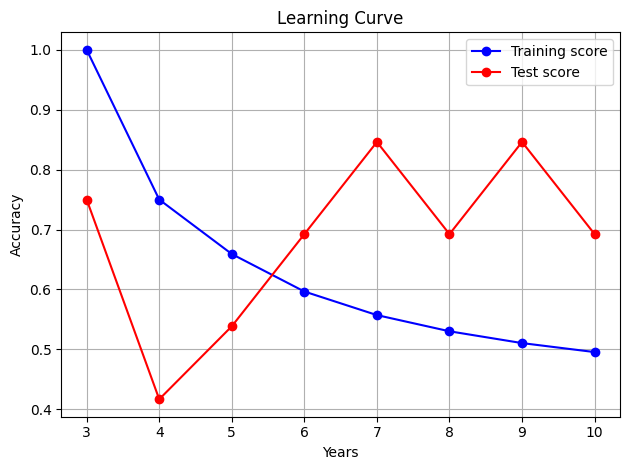

In [66]:
years = []
train_scores = []
test_scores = []

for year in df['year'].unique():
    if year < 3:
        continue

    print(f"---------------------- YEAR {year} ----------------------")

    class_utils.train_model_simple(classifier, df, year, target)

    y_test, y_test_prob, conf_test, y_train, y_train_prob, conf_train = class_utils.test_model(classifier, df, year,
                                                                                               target)

    y_test_pred = class_utils.enforce_max_teams(y_test_prob, conf_test)
    y_train_pred = class_utils.enforce_max_teams(y_train_prob, conf_train)

    eval.model_score(y_test, y_test_pred, y_test_prob, year == 10)

    years.append(year)
    test_scores.append(accuracy_score(y_test, y_test_pred))
    train_scores.append(accuracy_score(y_train, y_train_pred))

eval.plot_learning_curve(years, train_scores, test_scores)